In [1]:
# clone and install the YOLO from github repo
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -qr requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15368, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15368 (delta 1), reused 6 (delta 0), pack-reused 15355
Receiving objects: 100% (15368/15368), 14.36 MiB | 11.42 MiB/s, done.
Resolving deltas: 100% (10504/10504), done.
/kaggle/working/yolov5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.12.2 requires cupy-cuda115, which is not installed.
cudf 21.12.2 requires cupy-cuda115, which is not installed.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow-transform 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
tensorflow-serving-api 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
librosa 0.10.0

In [2]:
!sudo apt-get update

Get:1 http://packages.cloud.google.com/apt gcsfuse-focal InRelease [5002 B]
Get:2 https://packages.cloud.google.com/apt cloud-sdk InRelease [6361 B]       
Get:3 https://packages.cloud.google.com/apt google-fast-socket InRelease [5015 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]      
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease                         
Get:7 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [419 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]        
Get:9 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1027 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3069 kB]
Get:12 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2590 kB]
Get:13 http:/

In [3]:
!sudo apt-get install python3-venv --yes

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpython3.8 libpython3.8-minimal libpython3.8-stdlib python3.8
  python3.8-minimal python3.8-venv
Suggested packages:
  python3.8-doc binfmt-support
The following NEW packages will be installed:
  python3-venv python3.8-venv
The following packages will be upgraded:
  libpython3.8 libpython3.8-minimal libpython3.8-stdlib python3.8
  python3.8-minimal
5 upgraded, 2 newly installed, 0 to remove and 72 not upgraded.
Need to get 6314 kB of archives.
After this operation, 46.1 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libpython3.8 amd64 3.8.10-0ubuntu1~20.04.7 [1626 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 python3.8 amd64 3.8.10-0ubuntu1~20.04.7 [387 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libpython3.8-stdlib amd64 3.8.10-0ub

In [4]:
# build a virtual environment to run yolov5
!python3 -m venv yolov5-env

In [5]:
!source yolov5-env/bin/activate

In [6]:
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/cu111/torch_stable.html
!pip install wandb
!pip install pandas
!pip install matplotlib

Looking in links: https://download.pytorch.org/whl/cu111/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 583.1 kB/s eta 0:00:000:01m00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 35.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0
    Uninstalling torch-1.13.0:
      Successfully uninstalled torch-1.13.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.0
    Uninstalling torchvision-0.14.0:
      Successfully uninstalled torchvision-0.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytorch-lightning 1.9.4 requires torch>=1.10.0, but you have torch 1.9.0+cu111 which is incompatible.
kornia 0.6.11 requires torch>=1.9.1, but you have torch 1.9.0+cu111 which is incompatible.


In [7]:
!pip install -qr requirements.txt

In [8]:
import yolov5

In [9]:
import pandas as pd
import numpy as np
import os
import glob
from datetime import datetime
import xml.etree.ElementTree as ET 
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # suppress warning messages that may occur during the execution of a Python program

In [10]:
# define the path of images and annotations
path_anno = "/kaggle/input/face-mask-detection/annotations"
path_img = "/kaggle/input/face-mask-detection/images"

In [11]:
# build new dataset to store the annotation information
dataset = {
            "filename":[],
            "category":[],    
            "width":[],
            "height":[],
            "xmin":[],
            "ymin":[],   
            "xmax":[],
            "ymax":[],
           }

In [13]:
for annotation in glob.glob(path_anno+"/*.xml"):
    tree = ET.parse(annotation)  # read xml files annotations

    # obtain the width and height of imagines 
    for elem in tree.iter():
        if 'size' in elem.tag:
            for attr in list(elem):
                if 'width' in attr.tag: 
                    width = int(round(float(attr.text)))
                if 'height' in attr.tag:
                    height = int(round(float(attr.text))) 
                    
        # obtain the bounding box information

        if 'object' in elem.tag:
            for attr in list(elem):
                
                if 'name' in attr.tag:
                    name = attr.text                 
                    dataset['category']+=[name]
                    dataset['width']+=[width]
                    dataset['height']+=[height] 
                    dataset['filename']+=[annotation.split('/')[-1][0:-4]] 
                    
                if 'bndbox' in attr.tag:
                    for dim in list(attr):
                        if 'xmin' in dim.tag:
                            xmin = int(round(float(dim.text)))
                            dataset['xmin']+=[xmin]
                        if 'ymin' in dim.tag:
                            ymin = int(round(float(dim.text)))
                            dataset['ymin']+=[ymin]                                
                        if 'xmax' in dim.tag:
                            xmax = int(round(float(dim.text)))
                            dataset['xmax']+=[xmax]                                
                        if 'ymax' in dim.tag:
                            ymax = int(round(float(dim.text)))
                            dataset['ymax']+=[ymax]    

In [14]:
len(dataset['category'])

4072

In [15]:
# store the img information in dataframe
mask_data=pd.DataFrame(dataset)
mask_data

filename               category  width  height  xmin  ymin  xmax  \
0     maksssksksss737              with_mask    400     226    28    55    46   
1     maksssksksss737              with_mask    400     226    98    62   111   
2     maksssksksss737  mask_weared_incorrect    400     226   159    50   193   
3     maksssksksss737              with_mask    400     226   293    59   313   
4     maksssksksss737              with_mask    400     226   352    51   372   
...               ...                    ...    ...     ...   ...   ...   ...   
4067   maksssksksss13              with_mask    400     226   229    53   241   
4068  maksssksksss138              with_mask    400     267    51   144   128   
4069  maksssksksss138              with_mask    400     267   147   169   217   
4070  maksssksksss138              with_mask    400     267   224    92   309   
4071  maksssksksss212              with_mask    267     400   115    75   169   

      ymax  
0       71  
1       78  
2       90  
3       80  
4       72  
...    ...  
4067    72  
4068   239  
4069   233  
4070   186  
4071   135  

[4072 rows x 8 columns]

In [16]:
# convert categories to numerical values
cate_dict = {
    'with_mask': 0,
    'mask_weared_incorrect': 1,
    'without_mask': 2 
}

mask_data['class'] = mask_data['category'].map(cate_dict)

In [17]:
mask_data

filename               category  width  height  xmin  ymin  xmax  \
0     maksssksksss737              with_mask    400     226    28    55    46   
1     maksssksksss737              with_mask    400     226    98    62   111   
2     maksssksksss737  mask_weared_incorrect    400     226   159    50   193   
3     maksssksksss737              with_mask    400     226   293    59   313   
4     maksssksksss737              with_mask    400     226   352    51   372   
...               ...                    ...    ...     ...   ...   ...   ...   
4067   maksssksksss13              with_mask    400     226   229    53   241   
4068  maksssksksss138              with_mask    400     267    51   144   128   
4069  maksssksksss138              with_mask    400     267   147   169   217   
4070  maksssksksss138              with_mask    400     267   224    92   309   
4071  maksssksksss212              with_mask    267     400   115    75   169   

      ymax  class  
0       71      0  
1       78      0  
2       90      1  
3       80      0  
4       72      0  
...    ...    ...  
4067    72      0  
4068   239      0  
4069   233      0  
4070   186      0  
4071   135      0  

[4072 rows x 9 columns]

In [18]:
# create a list of img names
img_names = [*os.listdir("/kaggle/input/face-mask-detection/images")]

In [19]:
img_names[0:5]

['maksssksksss810.png',
 'maksssksksss848.png',
 'maksssksksss145.png',
 'maksssksksss825.png',
 'maksssksksss30.png']

In [20]:
# total 853 images
len(img_names)

853

In [21]:
# split the images into training, validation and testing sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(img_names, test_size=0.2, random_state=42)
test, val = train_test_split(test, test_size=0.7, random_state=42)

In [22]:
# create train, validation and test dir
os.chdir('/kaggle/working/')
os.mkdir('./yolov5/data/train')
os.mkdir('./yolov5/data/val')
os.mkdir('./yolov5/data/test')
os.mkdir('./yolov5/data/train/images')
os.mkdir('./yolov5/data/train/labels')
os.mkdir('./yolov5/data/test/images')
os.mkdir('./yolov5/data/test/labels')
os.mkdir('./yolov5/data/val/images')
os.mkdir('./yolov5/data/val/labels')

In [23]:
# define the images copy function and set the input and output path
from PIL import Image

def copyImages(imageList, folder_Name):
    for image in imageList:
        img = Image.open("../input/face-mask-detection/images/"+image)
        img1 = img.resize((640, 480))
        _ = img1.save("./yolov5/data/"+folder_Name+"/images/"+image)


In [24]:
copyImages(train, "train")
copyImages(val, "val")
copyImages(test, "test")

In [25]:
mask_data.head()

filename               category  width  height  xmin  ymin  xmax  \
0  maksssksksss737              with_mask    400     226    28    55    46   
1  maksssksksss737              with_mask    400     226    98    62   111   
2  maksssksksss737  mask_weared_incorrect    400     226   159    50   193   
3  maksssksksss737              with_mask    400     226   293    59   313   
4  maksssksksss737              with_mask    400     226   352    51   372   

   ymax  class  
0    71      0  
1    78      0  
2    90      1  
3    80      0  
4    72      0

In [26]:
# convert the bounding box size according to the new 640 * 480 images
mask_data['xmax'] = (640/mask_data['width'])*mask_data['xmax']
mask_data['ymax'] = (480/mask_data['height'])*mask_data['ymax']
mask_data['xmin'] = (640/mask_data['width'])*mask_data['xmin']
mask_data['ymin'] = (480/mask_data['height'])*mask_data['ymin']

In [27]:
mask_data.head()

filename               category  width  height   xmin        ymin  \
0  maksssksksss737              with_mask    400     226   44.8  116.814159   
1  maksssksksss737              with_mask    400     226  156.8  131.681416   
2  maksssksksss737  mask_weared_incorrect    400     226  254.4  106.194690   
3  maksssksksss737              with_mask    400     226  468.8  125.309735   
4  maksssksksss737              with_mask    400     226  563.2  108.318584   

    xmax        ymax  class  
0   73.6  150.796460      0  
1  177.6  165.663717      0  
2  308.8  191.150442      1  
3  500.8  169.911504      0  
4  595.2  152.920354      0

In [28]:
# convert the value from float to int
mask_data[['xmax', 'ymax', 'xmin', 'ymin']] = mask_data[['xmax', 'ymax', 'xmin', 'ymin']].astype('int64')

In [29]:
mask_data.head()

filename               category  width  height  xmin  ymin  xmax  \
0  maksssksksss737              with_mask    400     226    44   116    73   
1  maksssksksss737              with_mask    400     226   156   131   177   
2  maksssksksss737  mask_weared_incorrect    400     226   254   106   308   
3  maksssksksss737              with_mask    400     226   468   125   500   
4  maksssksksss737              with_mask    400     226   563   108   595   

   ymax  class  
0   150      0  
1   165      0  
2   191      1  
3   169      0  
4   152      0

In [30]:
# Calculate the center position, height and width of bounding box (4 critical parameters for YOLOV5)
mask_data['x_center'] = (mask_data['xmax']+mask_data['xmin'])/(2*640)
mask_data['y_center'] = (mask_data['ymax']+mask_data['ymin'])/(2*480)
mask_data['box_height'] = (mask_data['xmax']-mask_data['xmin'])/(640)
mask_data['box_width'] = (mask_data['ymax']-mask_data['ymin'])/(480)

In [31]:
mask_data.head()

filename               category  width  height  xmin  ymin  xmax  \
0  maksssksksss737              with_mask    400     226    44   116    73   
1  maksssksksss737              with_mask    400     226   156   131   177   
2  maksssksksss737  mask_weared_incorrect    400     226   254   106   308   
3  maksssksksss737              with_mask    400     226   468   125   500   
4  maksssksksss737              with_mask    400     226   563   108   595   

   ymax  class  x_center  y_center  box_height  box_width  
0   150      0  0.091406  0.277083    0.045312   0.070833  
1   165      0  0.260156  0.308333    0.032813   0.070833  
2   191      1  0.439063  0.309375    0.084375   0.177083  
3   169      0  0.756250  0.306250    0.050000   0.091667  
4   152      0  0.904687  0.270833    0.050000   0.091667

In [32]:
data_string = mask_data.astype('string')

In [33]:
def create_labels(image_list, data_name):
    #create a list of image names without .img
    fileNames = [x.split(".")[0] for x in image_list]
    
    # create dataframe where 'filename' column = name
    for name in fileNames:
        data = data_string[data_string.filename==name]
        box_list = []
        
        # add object class and 4 box parameters in box_list
        for index in range(len(data)):
            row = data.iloc[index]
            box_list.append(row['class']+" "+row["x_center"]+" "+row["y_center"]\
                        +" "+row["box_height"]+" "+row["box_width"])
        
        # convert the bound box information to a string for YOLOV5 to detect
        text = "\n".join(box_list)
        with open("./yolov5/data/"+data_name+"/labels/"+name+".txt", "w") as file:
            file.write(text)
            

In [34]:
create_labels(train, "train")
create_labels(val, "val")
create_labels(test, "test")

In [35]:
# check if the label files have been created
folder_path = './yolov5/data/train/labels'
files = os.listdir(folder_path)

for file in files:
    print(file)
    break


maksssksksss270.txt


In [36]:
# check the class and bounding box parameters in the lable file
with open(os.path.join(folder_path, files[0]), 'r') as file:
    file_contents = file.read()
    print(file_contents)


0 0.2140625 0.49166666666666664 0.084375 0.15833333333333333
0 0.47265625 0.49895833333333334 0.0921875 0.18125
0 0.67109375 0.246875 0.0921875 0.17708333333333334
2 0.28828125 0.38333333333333336 0.0515625 0.10416666666666667
2 0.5515625 0.421875 0.034375 0.08541666666666667
2 0.896875 0.41458333333333336 0.025 0.07083333333333333


In [37]:
# go to YOLO directory
%cd yolov5

/kaggle/working/yolov5


In [38]:
# initializes Notebook display to show images produced by the YOLOv5 model
from IPython.display import Image, clear_output
import torch
from yolov5 import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-134-g23c4923 Python-3.7.12 torch-1.9.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


Setup complete ✅ (2 CPUs, 15.6 GB RAM, 4561.2/8062.4 GB disk)


In [39]:
# define the train and val directories of yaml text, nc means number of class
yaml_text = """train: data/train/images
val: data/train/images

nc: 3
names: ['with_mask', 'mask_weared_incorrect', 'without_mask']"""


In [40]:
# write yaml text to data.yaml
with open("data/data.yaml", 'w') as file:
    file.write(yaml_text)


In [41]:
with open("data/data.yaml", 'r') as file:
    print(file.read())


train: data/train/images
val: data/train/images

nc: 3
names: ['with_mask', 'mask_weared_incorrect', 'without_mask']


In [42]:
#customize iPython writefile to write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [43]:
%%writetemplate models/custom_yolov5s.yaml

# parameters
nc: 3  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
    - [10,13, 16,30, 33,23]  
    - [30,61, 62,45, 59,119]  
    - [116,90, 156,198, 373,326] 
    
# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]], 
   [-1, 1, Conv, [128, 3, 2]],  
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  
  ]

# YOLOv5 head
head:
    [[-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, 'nearest']],
    [[-1, 6], 1, Concat, [1]],  
    [-1, 3, BottleneckCSP, [512, False]],  

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, 'nearest']],
    [[-1, 4], 1, Concat, [1]],  
    [-1, 3, BottleneckCSP, [256, False]],  

    [-1, 1, Conv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]],  
    [-1, 3, BottleneckCSP, [512, False]],  

    [-1, 1, Conv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]],  
    [-1, 3, BottleneckCSP, [1024, False]], 

    [[17, 20, 23], 1, Detect, [nc, anchors]],  
    ]
    

In [44]:
# train yolov5s on data
# record the time of training
# --img: size of image; 
# --data: The path to the data configuration file
# --cfg: The path to the model configuration file
# --name: The name of the results folder
# --cache: Enable caching images for faster training

start = datetime.now()
!python train.py --img 640 --batch 32 --epochs 50 --data data/data.yaml --cfg models/custom_yolov5s.yaml --weights yolov5s.pt --name yolov5s_results  --cache
end = datetime.now()

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=models/custom_yolov5s.yaml, data=data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to 

In [45]:
print("Runtime =",end-start)

Runtime = 0:15:59.979101


In [46]:
file_list = os.listdir('runs/train/yolov5s_results')
file_list

['results.png',
 'val_batch1_labels.jpg',
 'events.out.tfevents.1680659477.45e239103c7a.1201.0',
 'val_batch0_labels.jpg',
 'val_batch0_pred.jpg',
 'weights',
 'confusion_matrix.png',
 'val_batch2_labels.jpg',
 'PR_curve.png',
 'R_curve.png',
 'labels.jpg',
 'F1_curve.png',
 'train_batch0.jpg',
 'labels_correlogram.jpg',
 'train_batch1.jpg',
 'val_batch2_pred.jpg',
 'val_batch1_pred.jpg',
 'P_curve.png',
 'results.csv',
 'opt.yaml',
 'hyp.yaml',
 'train_batch2.jpg']

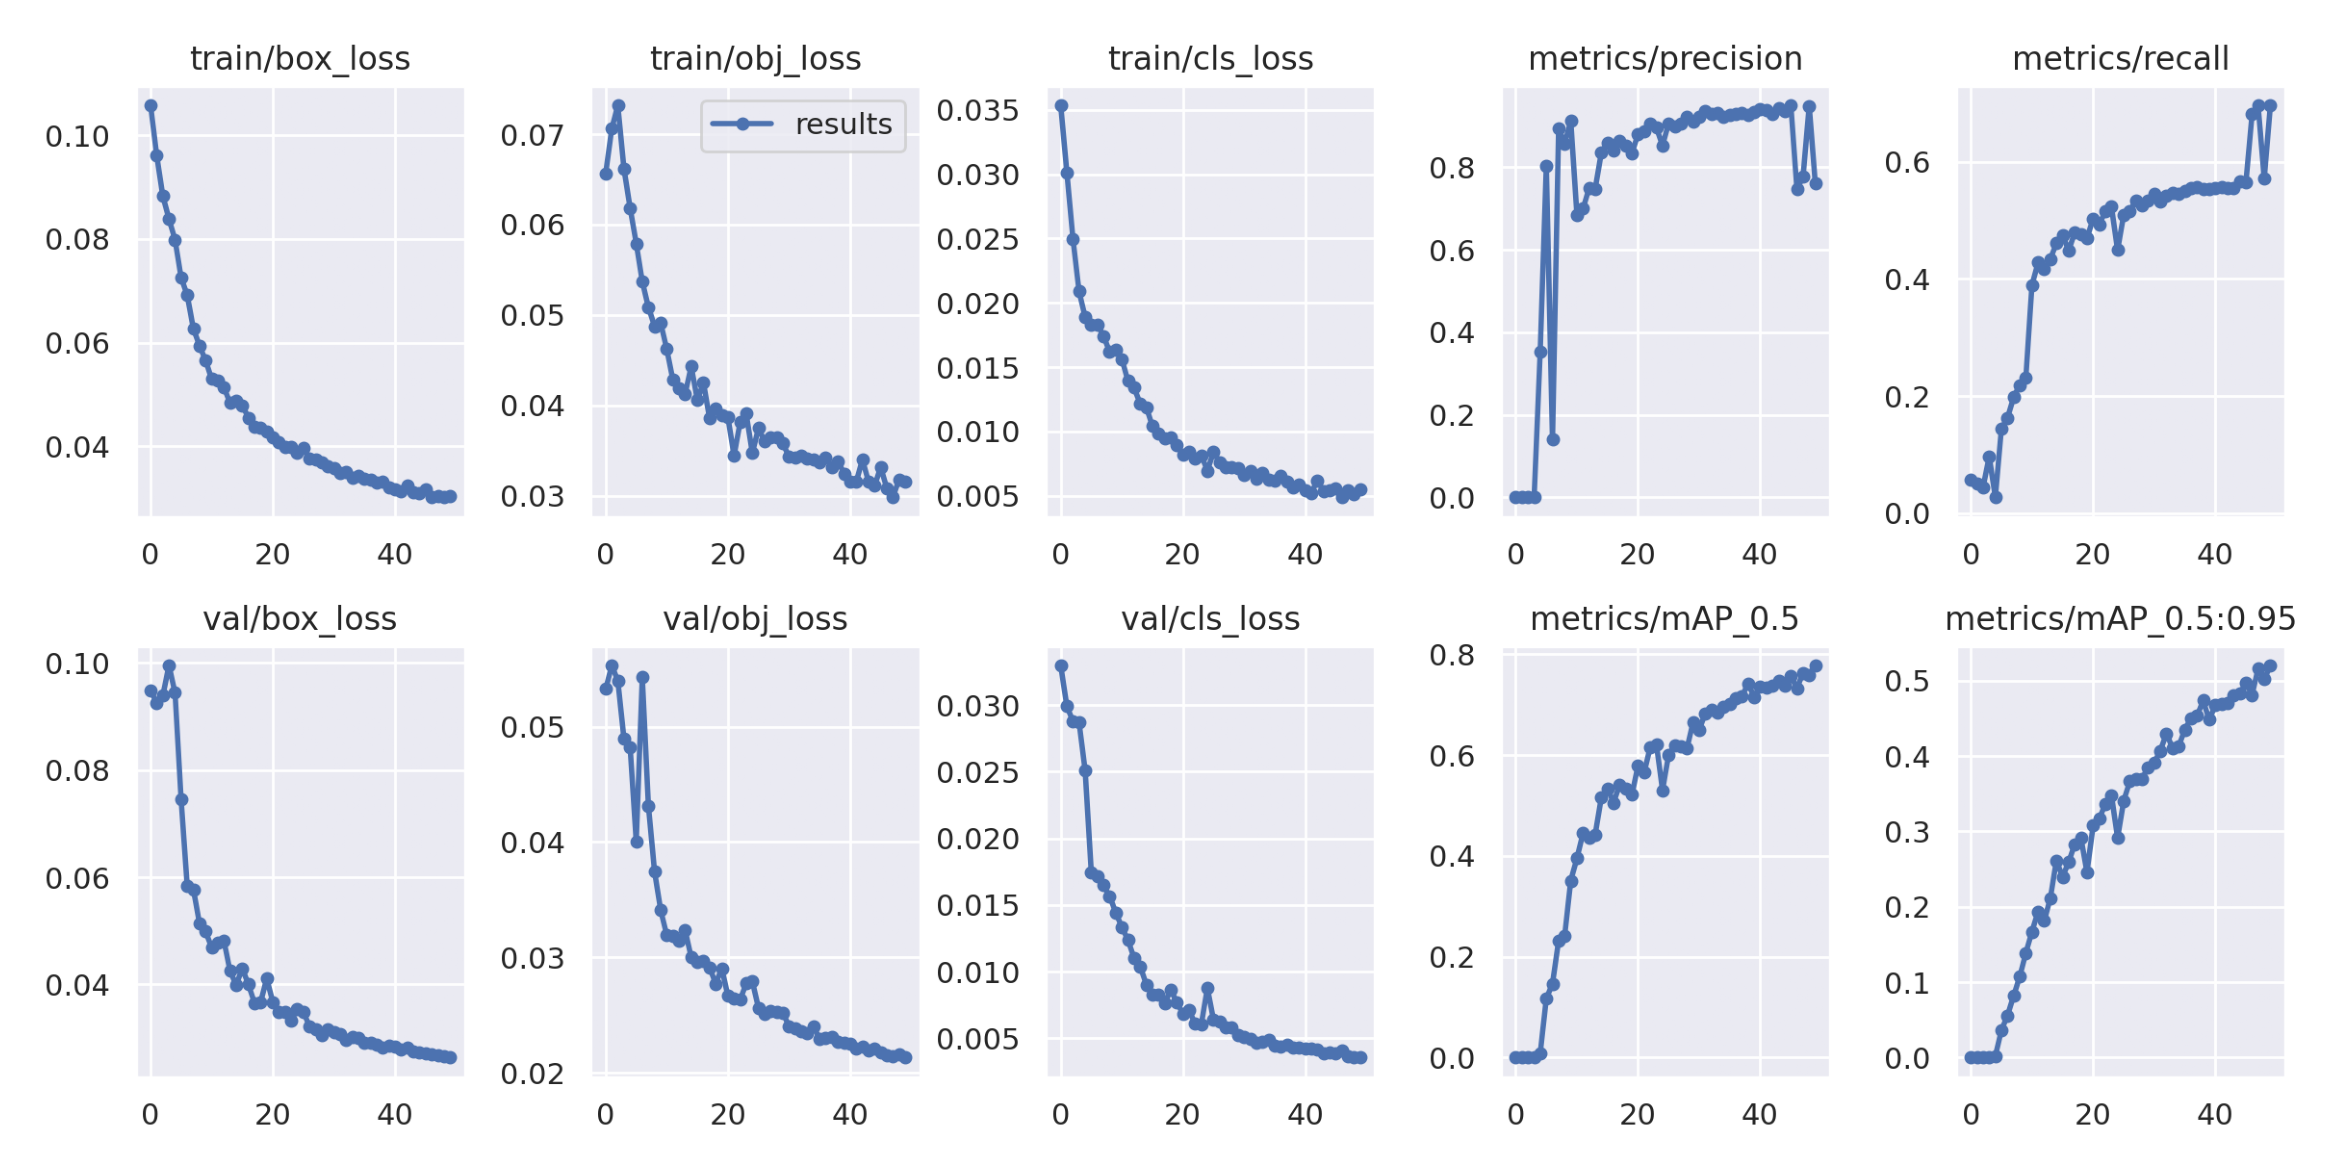

In [47]:
plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(plt.imread('/kaggle/working/yolov5/runs/train/yolov5s_results/results.png'))

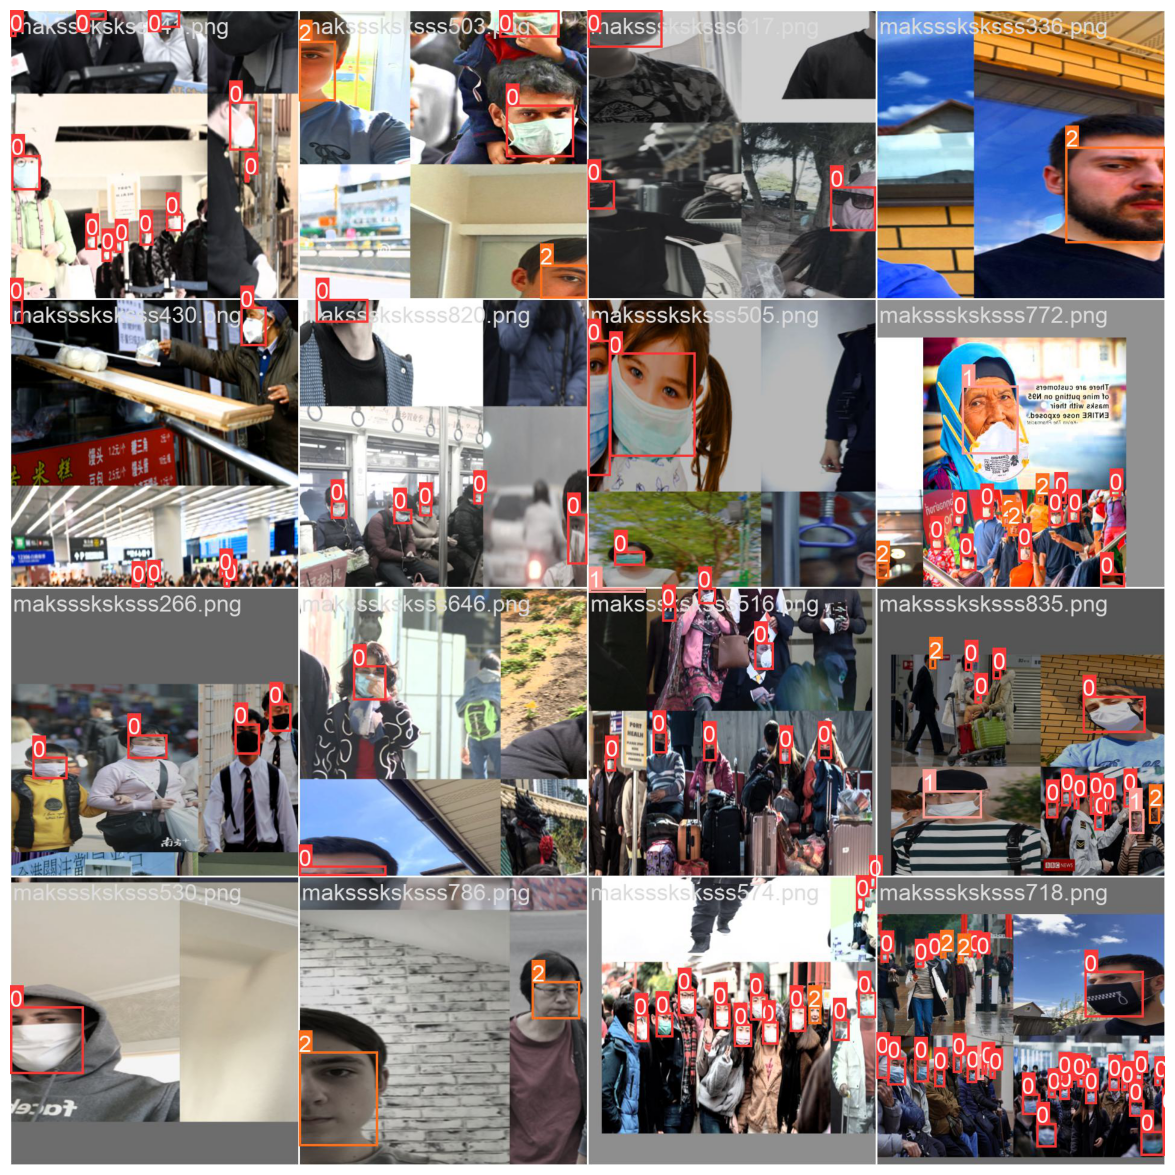

In [48]:
# visualize the train results
img = plt.imread('runs/train/yolov5s_results/train_batch2.jpg')
plt.figure(figsize=(20,15))
plt.imshow(img)
plt.axis('off')
plt.show()

In [49]:
# apply YOLOv5 framework on test images
# --conf 0.4: 
!python detect.py --source data/test/images/ --weight runs/train/yolov5s_results/weights/best.pt --name expTestImage --conf 0.4

detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=data/test/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=expTestImage, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLOv5 requirement "tqdm>=4.64.0" not found, attempting AutoUpdate...

requirements: 1 package updated per /kaggle/working/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v7.0-134-g23c4923 Python-3.7.12 torch-1.9.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7251912 parameters, 0 gradients
image 1/51 /kaggle/working/yolov5/data/test/images/maksssksksss113.png: 480x640 3 

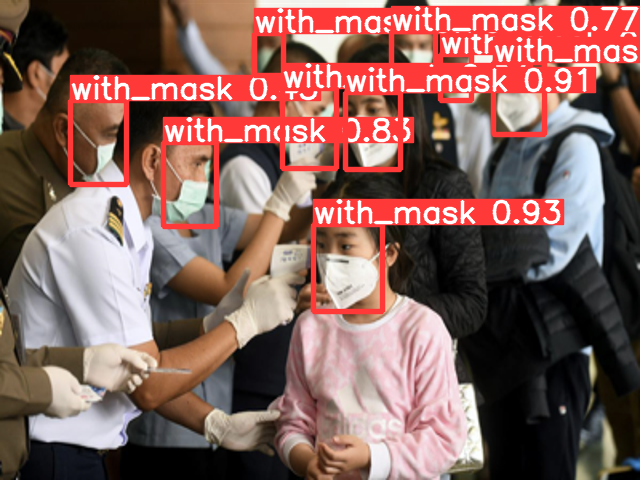

In [50]:
Image("/kaggle/working/yolov5/runs/detect/expTestImage/maksssksksss90.png")

In [51]:
current_path = os.getcwd()
print(current_path)

/kaggle/working/yolov5


In [52]:
!wget https://www.ed.ac.uk/files/styles/landscape_breakpoints_theme_uoe_mobile_1x/public/thumbnails/image/gettyimages-1215069129_jacoblund.png

--2023-04-05 02:08:34--  https://www.ed.ac.uk/files/styles/landscape_breakpoints_theme_uoe_mobile_1x/public/thumbnails/image/gettyimages-1215069129_jacoblund.png
Resolving www.ed.ac.uk (www.ed.ac.uk)... 23.185.0.1, 2620:12a:8000::1, 2620:12a:8001::1
Connecting to www.ed.ac.uk (www.ed.ac.uk)|23.185.0.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 628123 (613K) [image/png]
Saving to: ‘gettyimages-1215069129_jacoblund.png’

gettyimages-1215069 100%[===================>] 613.40K  --.-KB/s    in 0.1s    

2023-04-05 02:08:34 (5.08 MB/s) - ‘gettyimages-1215069129_jacoblund.png’ saved [628123/628123]



In [53]:
!python detect.py --source "/kaggle/working/yolov5/gettyimages-1215069129_jacoblund.png" --weights '/kaggle/working/yolov5/runs/train/yolov5s_results/weights/best.pt'

detect: weights=['/kaggle/working/yolov5/runs/train/yolov5s_results/weights/best.pt'], source=/kaggle/working/yolov5/gettyimages-1215069129_jacoblund.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLOv5 requirement "tqdm>=4.64.0" not found, attempting AutoUpdate...

requirements: 1 package updated per /kaggle/working/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v7.0-134-g23c4923 Python-3.7.12 torch-1.9.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7251912 parameters, 0 gradients
image 1/1 /kaggle/working

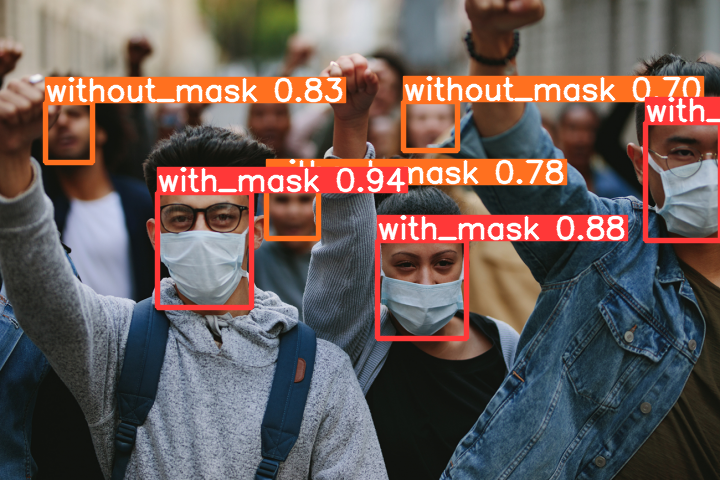

In [54]:
Image("/kaggle/working/yolov5/runs/detect/exp/gettyimages-1215069129_jacoblund.png")

In [55]:
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --source '/kaggle/input/facemask/mask.mp4' --conf 0.4 --save-txt --save-crop --project '/kaggle/working' --name 'mask_output'

detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=/kaggle/input/facemask/mask.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/kaggle/working, name=mask_output, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLOv5 requirement "tqdm>=4.64.0" not found, attempting AutoUpdate...

requirements: 1 package updated per /kaggle/working/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v7.0-134-g23c4923 Python-3.7.12 torch-1.9.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7251912 parameters, 0 gradients
video 1/1 (1/250) /kaggle/input/facemask/mask.mp4: 640x352 1 withou

In [56]:
#!pip install opencv-python-headless

In [ ]:
# model = torch.hub.load('ultralytics/yolov5', 'custom', path = '/kaggle/working/yolov5/runs/train/yolov5s_results/weights/best.pt', force_reload=True)

In [ ]:
#!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --source 0 --conf 0.4 --save-txt --save-crop --project '/kaggle/working' --name 'mask_output'

In [ ]:

'''
cap = cv2.VideoCapture(0)

assert cap.isOpened()
while(cap.isOpened()):
    ret, frame = cap.read()
    assert not isinstance(frame,type(None)), 'frame not found'
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
'''